In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import zscore

from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(2000)
np.set_printoptions(precision=3, suppress=True)

In [73]:
df = pd.read_csv("./bottle.csv")[["T_degC", "Salnty"]].dropna()

z_scores = zscore(df[["T_degC", "Salnty"]])
mask = (abs(z_scores) < 3).all(axis=1)
df = df[mask]

df = df.sample(frac=1).reset_index(drop=True)
df = df[0:10000]

/var/folders/6w/ndts3r4d2tsc330r4yk4bq2c0000gn/T/ipykernel_27014/1669341223.py:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./bottle.csv")[["T_degC", "Salnty"]].dropna()


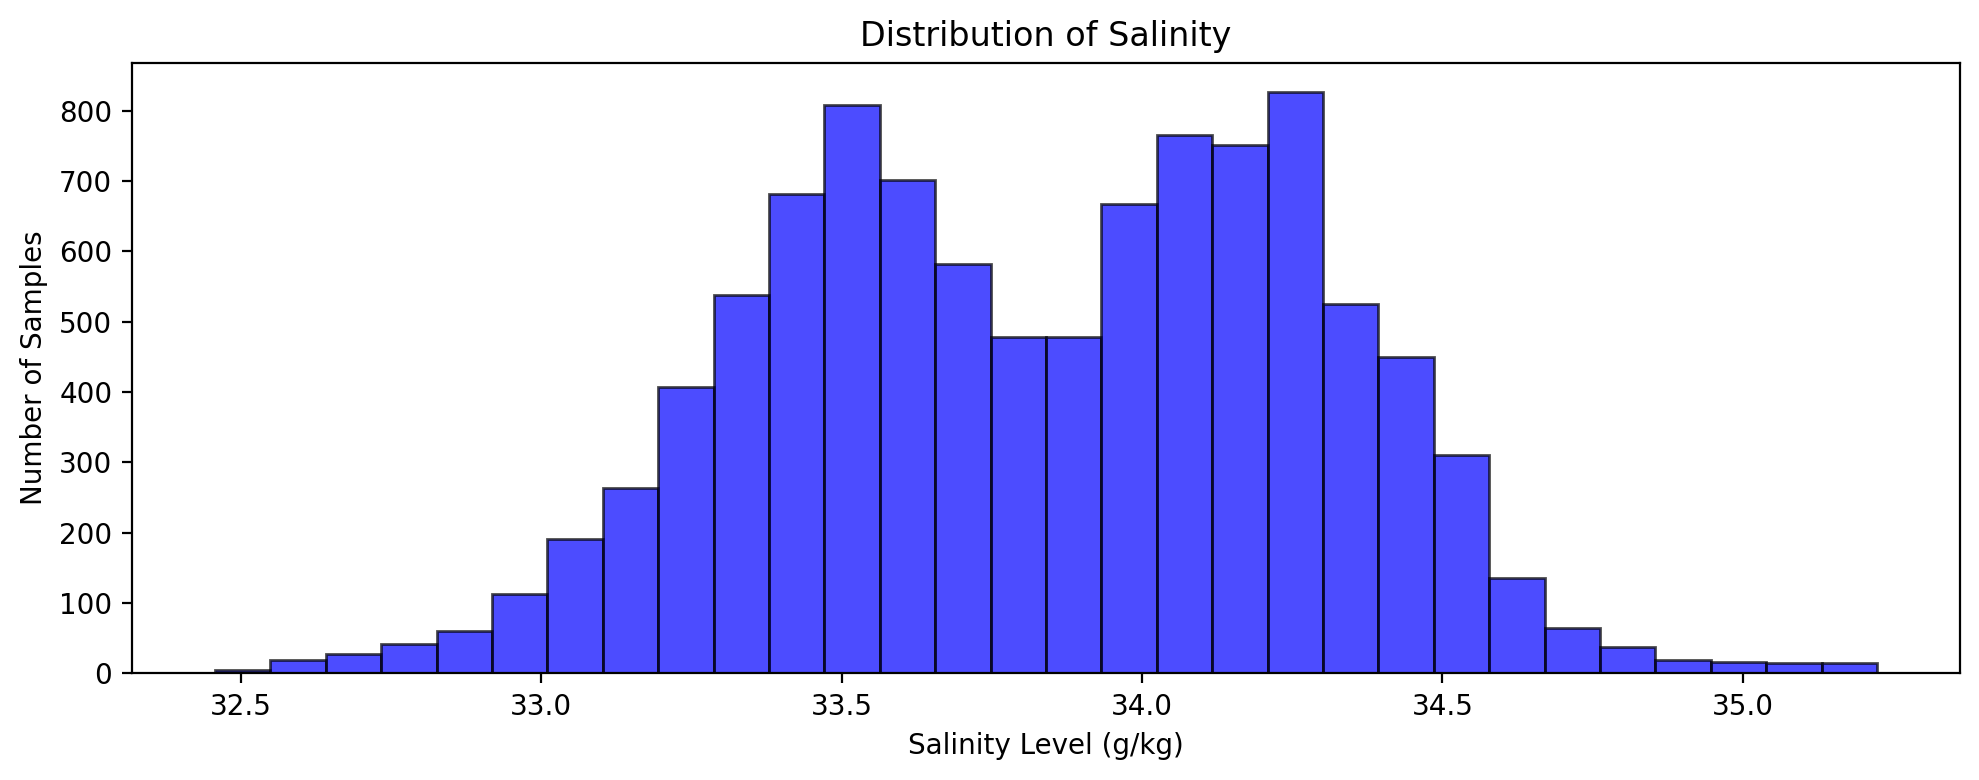

In [74]:
plt.figure(figsize=(10, 4), dpi=200)	
plt.title("Distribution of Salinity")
plt.xlabel("Salinity Level (g/kg)")
plt.ylabel("Number of Samples")

plt.hist(df["Salnty"], bins=30, color='blue', edgecolor='black', alpha=0.7)

plt.tight_layout()

In [75]:
print(round(np.mean(df[["Salnty"]]), 3))
print(round(np.median(df[["Salnty"]]), 3))
print(round(np.std(df[["Salnty"]]), 3))
print(round(np.min(df[["Salnty"]]), 3))
print(round(np.max(df[["Salnty"]]), 3))

33.838
33.854
Salnty    0.449
dtype: float64
32.457
35.223


/Users/brycekwon/Developer/personal/up-courses/egr361/final/.venv/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:4062: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


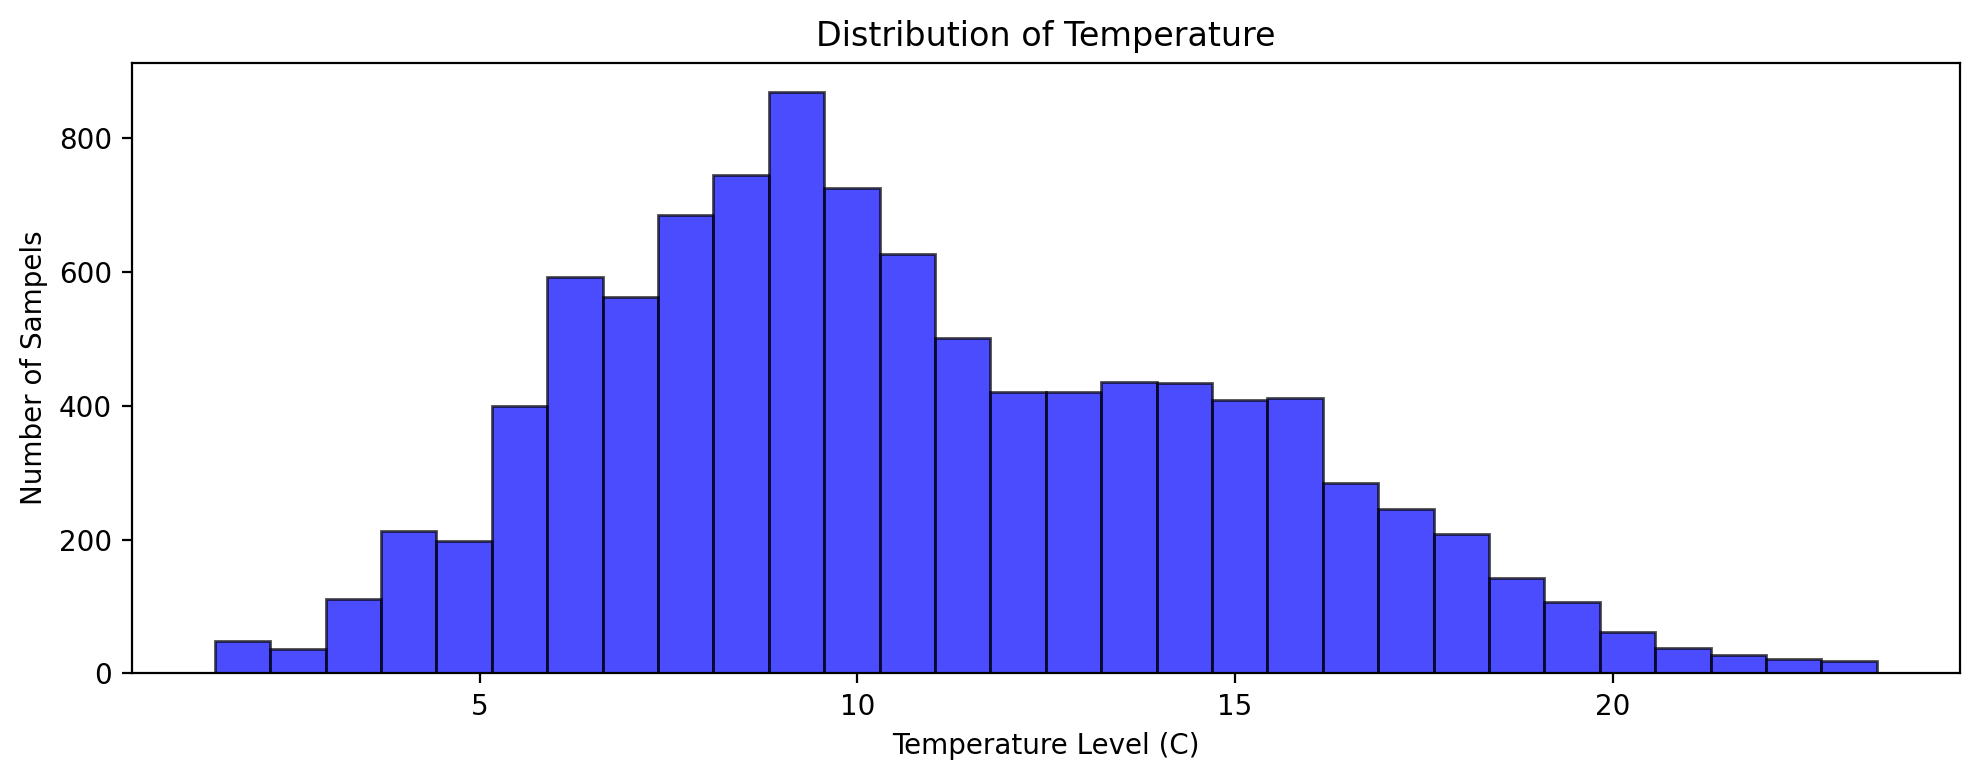

In [76]:
plt.figure(figsize=(10, 4), dpi=200)	
plt.title("Distribution of Temperature")
plt.ylabel("Number of Sampels")
plt.xlabel("Temperature Level (C)")

plt.hist(df["T_degC"], bins=30, color='blue', edgecolor='black', alpha=0.7)

plt.tight_layout()

In [77]:
print(round(np.mean(df[["T_degC"]]), 3))
print(round(np.median(df[["T_degC"]]), 3))
print(round(np.std(df[["T_degC"]]), 3))
print(round(np.min(df[["T_degC"]]), 3))
print(round(np.max(df[["T_degC"]]), 3))

10.768
10.08
T_degC    4.107
dtype: float64
1.49
23.5


/Users/brycekwon/Developer/personal/up-courses/egr361/final/.venv/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:4062: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [78]:
print(f"T_degC & Salnty {np.corrcoef(df["T_degC"], df["Salnty"])[1, 0]}")

T_degC & Salnty -0.5785500178175423


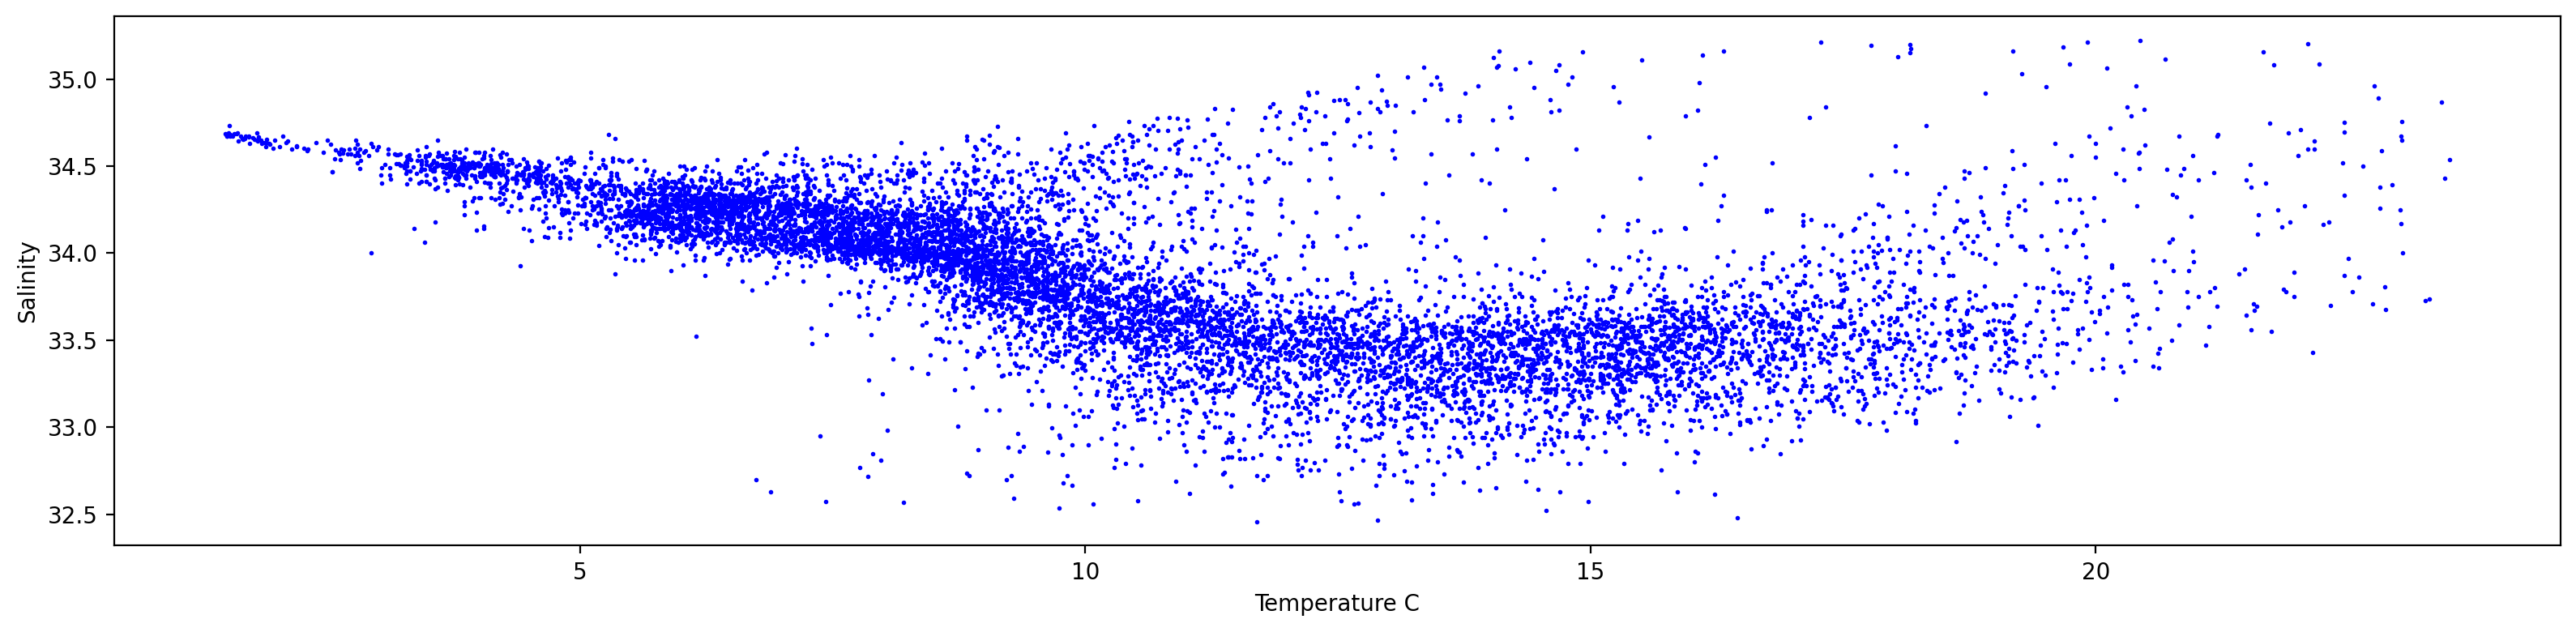

In [79]:
plt.figure(figsize=(16, 4), dpi=200)	

plt.scatter(df["T_degC"], df["Salnty"], s=1, color='b')
plt.xlabel("Temperature C")
plt.ylabel("Salinity")

plt.tight_layout()

In [80]:
X = df["T_degC"].to_numpy()
Y = df["Salnty"].to_numpy()

(10000,)
(8000,) (2000,)
(8000,) (2000,)
(8000,) (2000,)
(8000,) (2000,)
(8000,) (2000,)


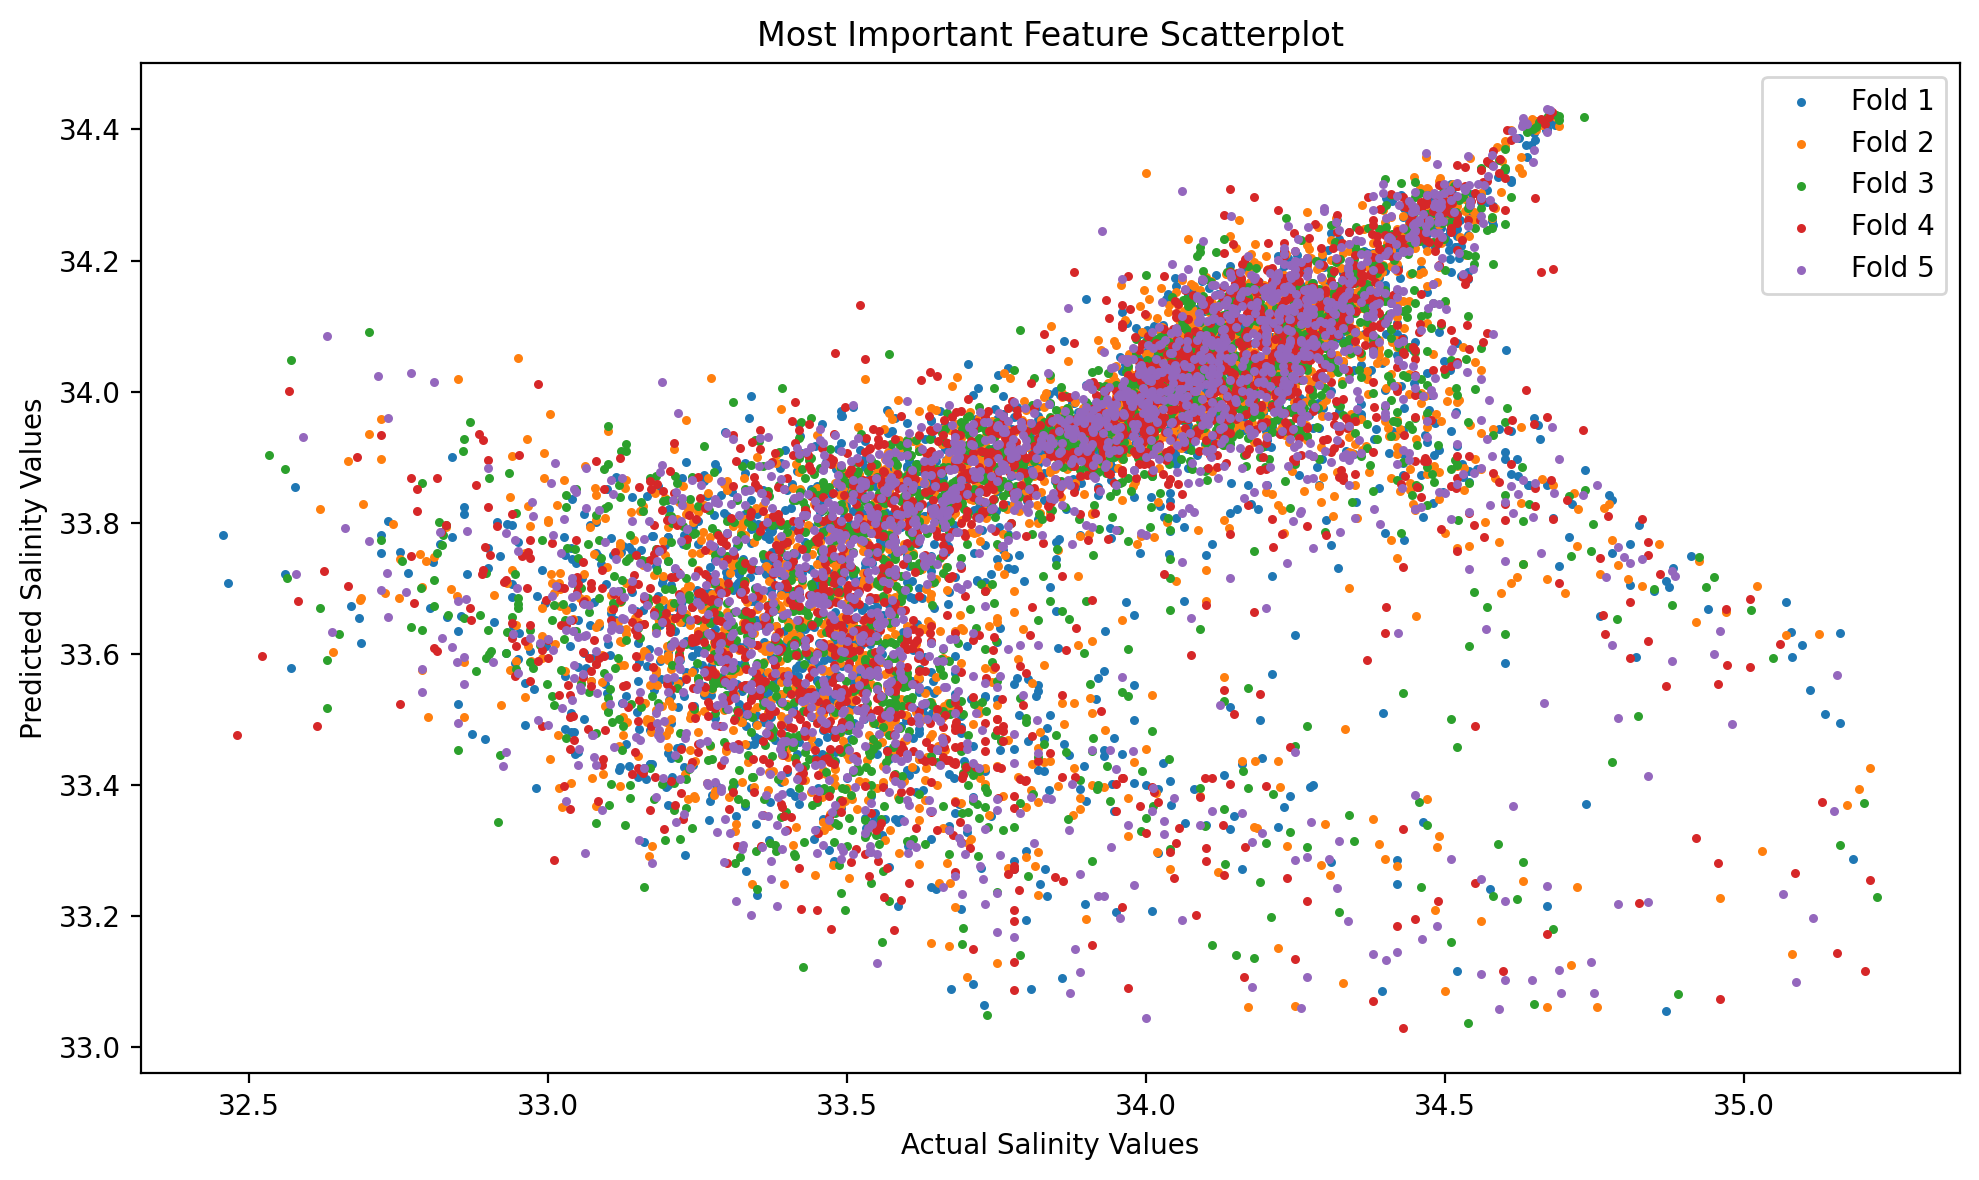

In [81]:
kf = KFold(n_splits=5)

beta = []
RMSE_train = []
RMSE_test = []
R2_train = []
R2_test = []

plt.figure(figsize=(10,6), dpi=200)
plt.title("Most Important Feature Scatterplot")
plt.xlabel('Actual Salinity Values')
plt.ylabel('Predicted Salinity Values')

print(X.shape)

for i, (train_idx, test_idx) in enumerate(kf.split(X)):
	xTrain = X[train_idx]
	xTest = X[test_idx]
	yTrain = Y[train_idx]
	yTest = Y[test_idx]

	print(xTrain.shape, xTest.shape)

	mean_val = np.mean(xTrain)
	std_val = np.std(xTrain)
	xTrain = (xTrain - mean_val) / std_val
	xTest = (xTest - mean_val) / std_val

	regr = linear_model.LinearRegression()
	regr.fit(xTrain.reshape(-1, 1), yTrain)

	y_pred_train = regr.predict(xTrain.reshape(-1, 1))
	y_pred_test = regr.predict(xTest.reshape(-1, 1))

	plt.scatter(yTest, y_pred_test, s=5, alpha=1, label=f"Fold {i+1}")

	beta.append(regr.coef_)
	this_rmse_train = mean_squared_error(yTrain, y_pred_train)**0.5
	this_rmse_test = mean_squared_error(yTest, y_pred_test)**0.5
	RMSE_train.append(this_rmse_train)
	RMSE_test.append(this_rmse_test)
	R2_train.append(r2_score(yTrain,y_pred_train))
	R2_test.append(r2_score(yTest,y_pred_test))

plt.legend()
plt.tight_layout()

In [82]:
print("\nthis is the beta: ")
print(beta)

print("\nthis is the RMSE for the training set: ")
print(np.array(RMSE_train))

print("\nthis is the RMSE for the testing set: ")
print(np.array(RMSE_test))

print("\nthis is the R2 for the training set: ")
print(np.array(R2_train))

print("\nthis is the R2 for the testing set: ")
print(np.array(R2_test))


this is the beta: 
[array([-0.255]), array([-0.26]), array([-0.258]), array([-0.262]), array([-0.263])]

this is the RMSE for the training set: 
[0.368 0.366 0.368 0.365 0.364]

this is the RMSE for the testing set: 
[0.359 0.367 0.36  0.371 0.375]

this is the R2 for the training set: 
[0.325 0.336 0.33  0.34  0.343]

this is the R2 for the testing set: 
[0.373 0.33  0.354 0.314 0.298]


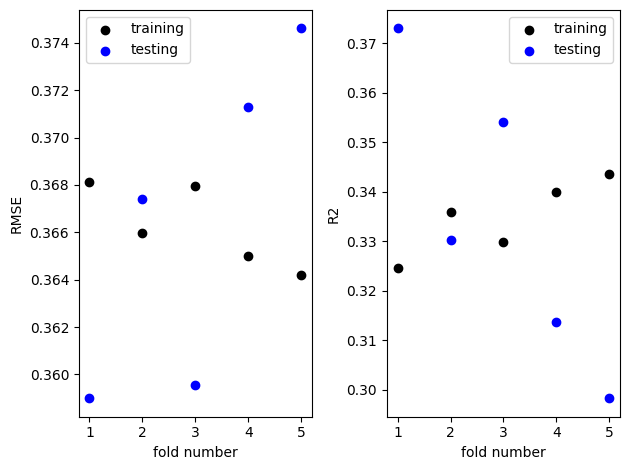

In [88]:
# plt.title("RMSE and R^2")

plt.subplot(121)
plt.scatter(range(1,6), RMSE_train, color="black", label="training")
plt.scatter(range(1,6), RMSE_test, color="blue", label="testing")

plt.xticks((1,2,3,4,5))

plt.xlabel('fold number')
plt.ylabel('RMSE')
plt.legend()

plt.subplot(122)
plt.scatter(range(1,6), R2_train, color="black", label="training")
plt.scatter(range(1,6), R2_test, color="blue", label="testing")

plt.xticks((1,2,3,4,5))

plt.xlabel('fold number')
plt.ylabel('R2')
plt.legend()

plt.tight_layout()